In [199]:
import numpy as np
import pandas as pd

In [200]:
data = pd.read_csv('../Datasets/Titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [201]:
data.shape

(891, 12)

In [202]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [203]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [204]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [205]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [206]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [207]:
# handle missing values

# Age
mean_age = data['Age'].mean()
print("Mean Age: ",mean_age)
data['Age'] = data['Age'].fillna(mean_age)

# Cabin
mode_cabin = data['Cabin'].mode()[0]
print("Cabin Mode: ",mode_cabin)
data['Cabin'] = data['Cabin'].fillna(mode_cabin)

# Embarked
mode_emb = data['Embarked'].mode()[0]
print("Embarked Mode: ",mode_emb)
data['Embarked'] = data['Embarked'].fillna(mode_emb)

Mean Age:  29.69911764705882
Cabin Mode:  B96 B98
Embarked Mode:  S


In [208]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [209]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [210]:
data['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [211]:
# Type Conversion
data['Age'] = data['Age'].astype('int')

In [212]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age              int64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [213]:
# Normalization - scaling

from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()

scaled_data = standard_scaler.fit_transform(data['Fare'].values.reshape(-1,1))

In [214]:
print(scaled_data[:5])

[[-0.50244517]
 [ 0.78684529]
 [-0.48885426]
 [ 0.42073024]
 [-0.48633742]]


In [215]:
# Convert categorical to numerical (Embarked S - 2, C - 0, Q - 1)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Embarked'] = le.fit_transform(data['Embarked'])

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,B96 B98,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,B96 B98,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,B96 B98,2


In [216]:
# Outliers Detection using Z-score

outliers = []

def detect_outliers(data):
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)

    for i in data:
        z = i-mean/std
        a = abs(z)
        if a> threshold : 
            outliers.append(i)
    return outliers

In [217]:
age_outliers = detect_outliers(data['Age'])
print(age_outliers)

[22, 38, 26, 35, 35, 29, 54, 27, 14, 58, 20, 39, 14, 55, 29, 31, 29, 35, 34, 15, 28, 8, 38, 29, 19, 29, 29, 40, 29, 29, 66, 28, 42, 29, 21, 18, 14, 40, 27, 29, 19, 29, 29, 29, 29, 18, 7, 21, 49, 29, 65, 29, 21, 28, 11, 22, 38, 45, 29, 29, 29, 19, 17, 26, 32, 16, 21, 26, 32, 25, 29, 29, 30, 22, 29, 29, 28, 17, 33, 16, 29, 23, 24, 29, 20, 46, 26, 59, 29, 71, 23, 34, 34, 28, 29, 21, 33, 37, 28, 21, 29, 38, 29, 47, 14, 22, 20, 17, 21, 70, 29, 24, 21, 29, 32, 32, 54, 12, 29, 24, 29, 45, 33, 20, 47, 29, 25, 23, 19, 37, 16, 24, 29, 22, 24, 19, 18, 19, 27, 9, 36, 42, 51, 22, 55, 40, 29, 51, 16, 30, 29, 29, 44, 40, 26, 17, 9, 29, 45, 29, 28, 61, 21, 56, 18, 29, 50, 30, 36, 29, 29, 9, 29, 29, 45, 40, 36, 32, 19, 19, 44, 58, 29, 42, 29, 24, 28, 29, 34, 45, 18, 32, 26, 16, 40, 24, 35, 22, 30, 29, 31, 27, 42, 32, 30, 16, 27, 51, 29, 38, 22, 19, 20, 18, 29, 35, 29, 59, 24, 29, 44, 8, 19, 33, 29, 29, 29, 22, 30, 44, 25, 24, 37, 54, 29, 29, 62, 30, 41, 29, 29, 30, 35, 50, 29, 52, 40, 29, 36, 16, 25, 5

In [218]:
import matplotlib.pyplot as plt
import seaborn as sns 

<Axes: xlabel='Age'>

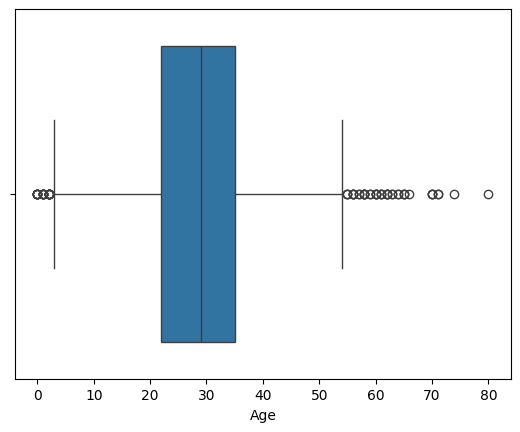

In [219]:
sns.boxplot(data=data,x="Age")

In [220]:
# Outliers Detection using IQR

outliers = []

def detect_outliers_iqr(data):
    threshold = 3
    q1 = np.percentile(data,25)
    q3 = np.percentile(data,75)
    iqr = q3-q1

    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    
    for i in data:
        if i>upper or i<lower:
            outliers.append(i)
    return outliers

In [221]:
age_outliers_iqr = detect_outliers_iqr(data['Age'])
print(age_outliers_iqr)

[2, 58, 55, 2, 66, 65, 0, 59, 71, 70, 2, 55, 1, 61, 1, 56, 1, 58, 2, 59, 62, 58, 63, 65, 2, 0, 61, 2, 60, 1, 1, 64, 65, 56, 0, 2, 63, 58, 55, 71, 2, 64, 62, 62, 60, 61, 57, 80, 2, 0, 56, 58, 70, 60, 60, 70, 0, 57, 1, 0, 2, 1, 62, 0, 74, 56]


<Axes: xlabel='Age'>

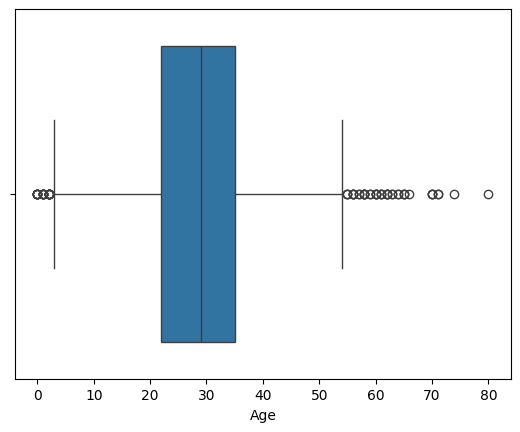

In [222]:
sns.boxplot(data=data,x='Age')

In [223]:
mean = data['Age'].mean()
print(mean)
for i in age_outliers_iqr:
    data['Age'].replace(to_replace=i, value=mean, inplace=True)

29.544332210998878


C:\Users\saksh\AppData\Local\Temp\ipykernel_12976\4086394662.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].replace(to_replace=i, value=mean, inplace=True)


In [224]:
age_outliers_iqr = detect_outliers_iqr(data['Age'])
print(age_outliers_iqr)

[2, 58, 55, 2, 66, 65, 0, 59, 71, 70, 2, 55, 1, 61, 1, 56, 1, 58, 2, 59, 62, 58, 63, 65, 2, 0, 61, 2, 60, 1, 1, 64, 65, 56, 0, 2, 63, 58, 55, 71, 2, 64, 62, 62, 60, 61, 57, 80, 2, 0, 56, 58, 70, 60, 60, 70, 0, 57, 1, 0, 2, 1, 62, 0, 74, 56, 54.0, 4.0, 8.0, 3.0, 7.0, 49.0, 5.0, 4.0, 54.0, 9.0, 51.0, 51.0, 9.0, 4.0, 50.0, 9.0, 4.0, 3.0, 51.0, 5.0, 8.0, 54.0, 50.0, 3.0, 52.0, 7.0, 50.0, 54.0, 3.0, 3.0, 51.0, 3.0, 50.0, 4.0, 5.0, 52.0, 49.0, 50.0, 48.0, 48.0, 9.0, 50.0, 9.0, 54.0, 54.0, 50.0, 7.0, 9.0, 50.0, 8.0, 48.0, 53.0, 54.0, 52.0, 49.0, 49.0, 4.0, 51.0, 9.0, 48.0, 50.0, 4.0, 52.0, 49.0, 48.0, 52.0, 6.0, 50.0, 48.0, 4.0, 6.0, 48.0, 51.0, 48.0, 54.0, 5.0, 8.0, 49.0, 6.0, 52.0, 4.0, 9.0, 51.0, 48.0, 4.0]


Median =  29.0


<Axes: xlabel='Age'>

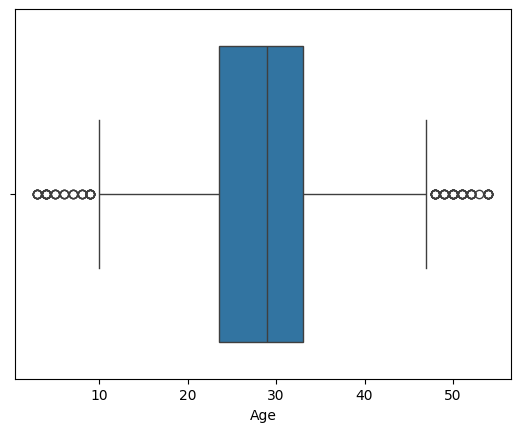

In [230]:
median = data['Age'].median()
print("Median = ",median)
sns.boxplot(data=data,x="Age")

In [226]:
# Skewness
from scipy.stats import skew
s1 = skew(data['Age'])
print(s1)

0.09197257463662332


In [227]:
# Squaring age to make distribution normal
data['sq_age'] = data['Age']**(2)

In [228]:
s2 = skew(data['sq_age'])

In [229]:
print(s2)

1.2537459107825086
